<a href="https://colab.research.google.com/github/KunalDM1999/ML-LEARNINGS-/blob/main/Assignement9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install scikit-learn==1.2.2

# Restart the runtime after installing the new version.
import sklearn
print(sklearn.__version__)



1.2.2


In [ ]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
X, y = load_wine(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion': ['entropy', 'gini'],
    'splitter': ['random', 'best'],
    'min_samples_leaf': [2, 4, 6, 8, 10],
    'max_depth': [3, 4, 5, 6]
}

model = DecisionTreeClassifier(random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=4)
grid_search.fit(X_train, y_train)

print("Best hyperparameters:", grid_search.best_params_)


Best hyperparameters: {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 2, 'splitter': 'best'}


In [ ]:
from sklearn.metrics import accuracy_score
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on testing set:", accuracy)


Accuracy on testing set: 0.9074074074074074


In [ ]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
X,y=load_diabetes(return_X_y=True)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=1)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
param_grid = {
    'criterion':'squared_error',
    'splitter': 'random',
    'max_leaf_nodes': 10
}
model = DecisionTreeRegressor(random_state=1)
model.set_params(**param_grid)
model.fit(X_train, y_train)
print("Training score:", model.score(X_train, y_train))
print("Testing score:", model.score(X_test, y_test))

Training score: 0.5032060624566737
Testing score: 0.218771375137222


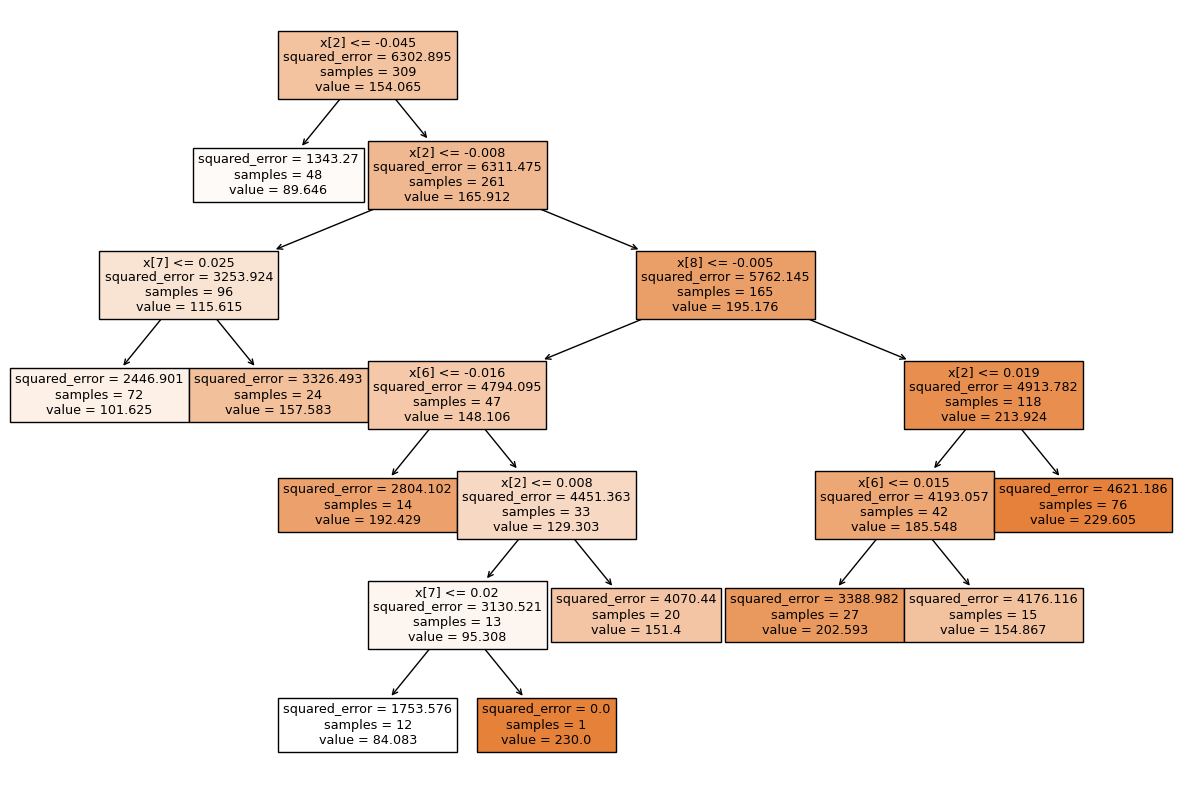

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))
plot_tree(model, filled=True)
plt.show()


In [ ]:

root_node_impurity = model.tree_.impurity[0]
print("Squared error at root node:", root_node_impurity)

Squared error at root node: 6302.89548706025


In [ ]:
left_child_samples = model.tree_.n_node_samples[1]
right_child_samples = model.tree_.n_node_samples[2]
ratio = left_child_samples / right_child_samples
print("Ratio of samples in left child to right child of root:", ratio)
left_child_samples, right_child_samples

Ratio of samples in left child to right child of root: 0.1839080459770115


(48, 261)

In [ ]:
X,y=load_diabetes(return_X_y=True)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=1)
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
param_grid = {
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    'splitter': ['random', 'best'],
     'max_features': [4,5,6,'sqrt', 'log2'],
    'ccp_alpha': [0.001,0.01,0.02,0.05],
}

model = DecisionTreeRegressor(max_depth = 4,random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=4)
grid_search.fit(X_train, y_train)

print("Best hyperparameters:", grid_search.best_params_)


Best hyperparameters: {'ccp_alpha': 0.001, 'criterion': 'squared_error', 'max_features': 5, 'splitter': 'random'}


In [ ]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print("Testing score:", best_model.score(X_test, y_test))


Testing score: 0.2276927113007854
